In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
customer_data = pd.read_csv("Mall_Customers.csv")

In [3]:
customer_data.sample(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
6,7,Female,35,18,6
10,11,Male,67,19,14
23,24,Male,31,25,73
131,132,Male,39,71,75
157,158,Female,30,78,78


In [4]:
customer_data.shape

(200, 5)

In [5]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
customer_data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
customer_data['Gender'].value_counts()

Gender
Female    112
Male       88
Name: count, dtype: int64

In [8]:
columns = ['Age','Annual Income (k$)', 'Spending Score (1-100)']

<Figure size 640x480 with 0 Axes>

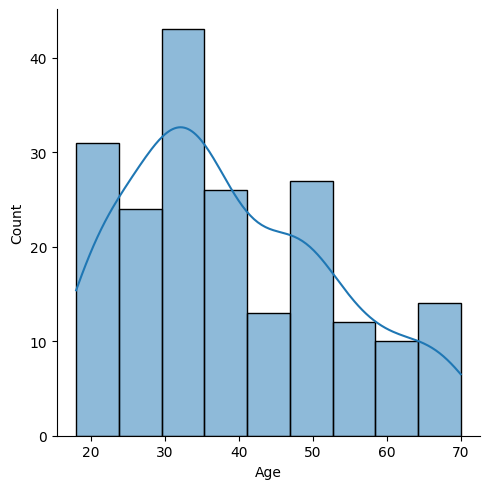

<Figure size 640x480 with 0 Axes>

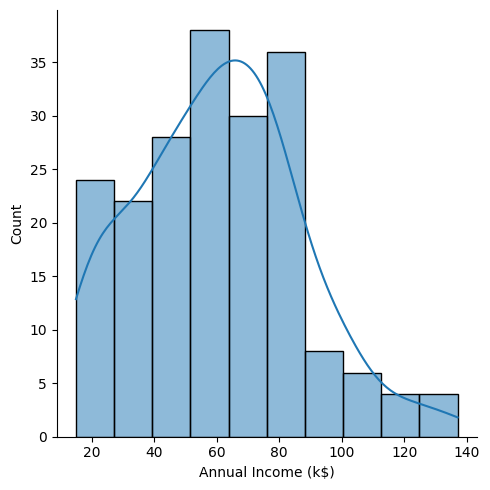

<Figure size 640x480 with 0 Axes>

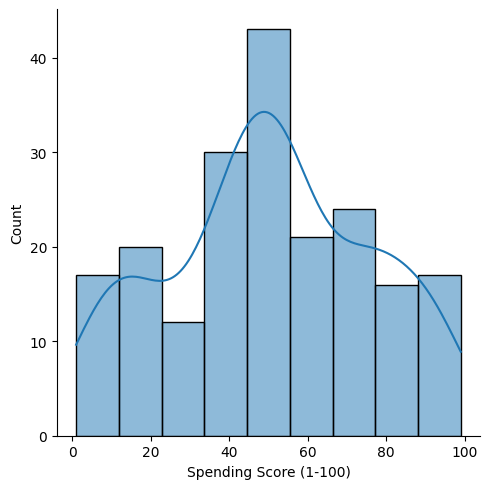

In [9]:
for i in columns:
    plt.figure()
    sns.displot(data = customer_data, x=i , kde = True)

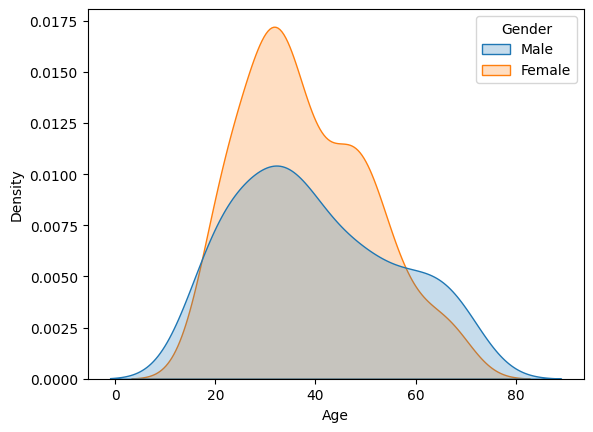

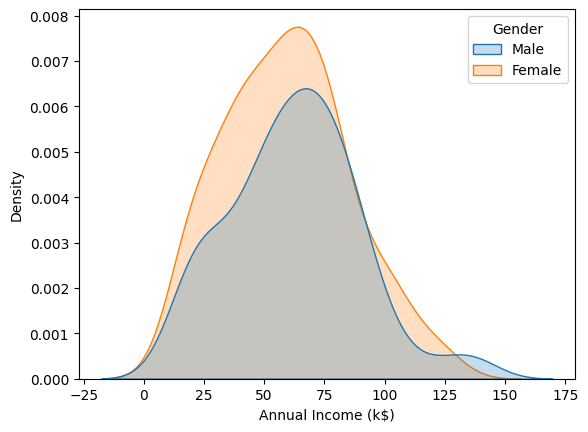

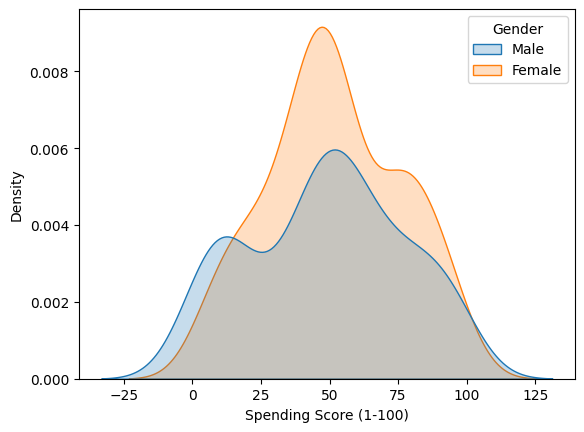

In [10]:
for i in columns:
    plt.figure()
    sns.kdeplot(data = customer_data, x=i , hue="Gender", fill= True)

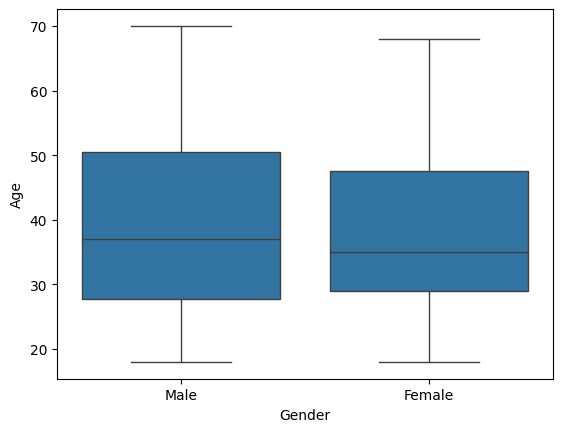

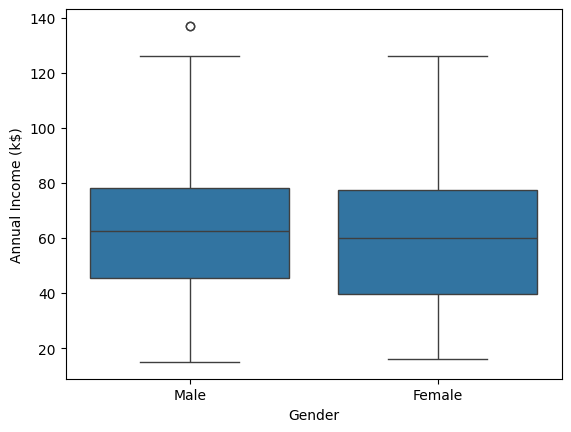

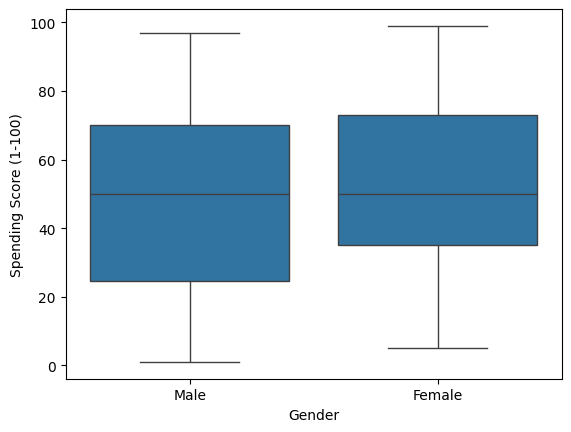

In [11]:
for i in columns:
    plt.figure()
    sns.boxplot(data = customer_data, x="Gender", y=i)

In [12]:
customer_data.groupby('Gender')['Age'].mean()

Gender
Female    38.098214
Male      39.806818
Name: Age, dtype: float64

In [13]:
customer_data.groupby('Gender')['Annual Income (k$)'].mean()

Gender
Female    59.250000
Male      62.227273
Name: Annual Income (k$), dtype: float64

In [14]:
customer_data.groupby('Gender')['Spending Score (1-100)'].mean()

Gender
Female    51.526786
Male      48.511364
Name: Spending Score (1-100), dtype: float64

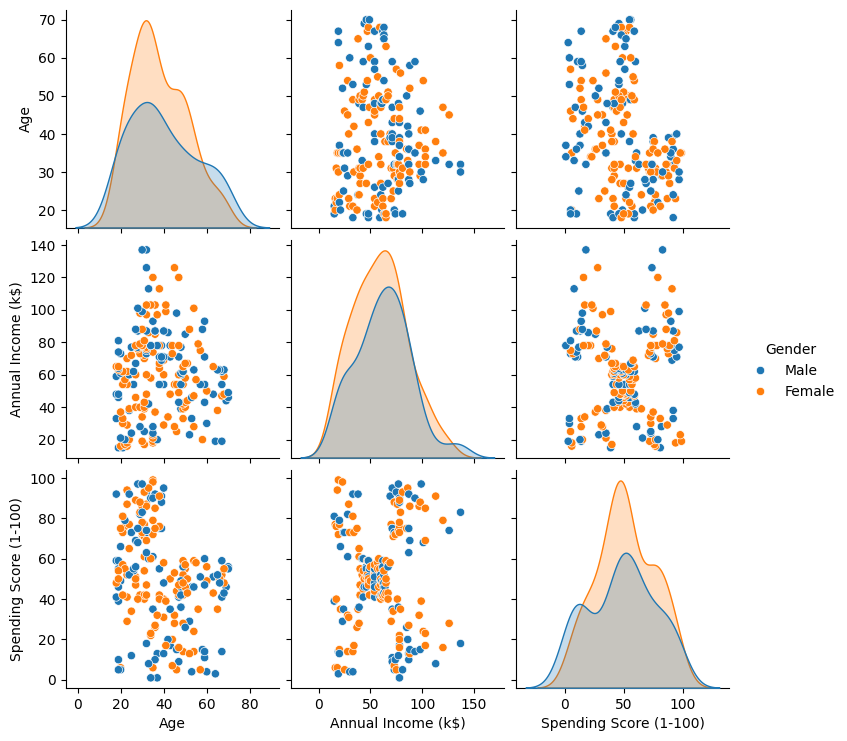

In [15]:
sns.pairplot(customer_data, vars=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'], hue='Gender')

In [16]:
customer_data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].corr()

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


<Axes: >

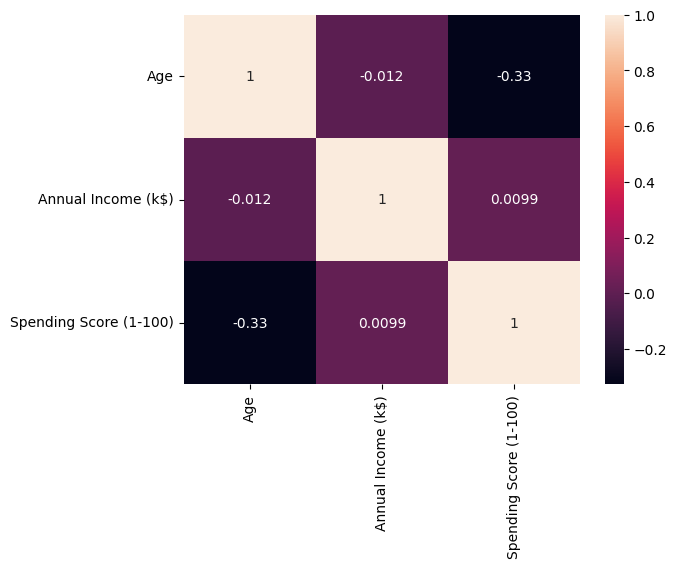

In [17]:
sns.heatmap(data=customer_data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].corr(), annot=True)

In [18]:
from sklearn.cluster import KMeans

Age Segmentation

In [19]:
inertia_score = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(customer_data[['Age']])
    inertia_score.append(kmeans.inertia_)

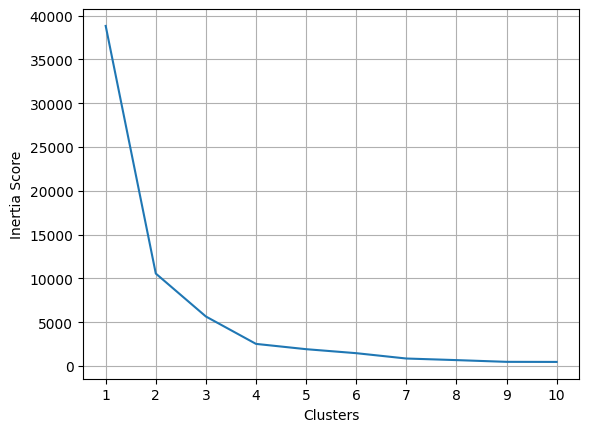

In [20]:
plt.plot(range(1,11), inertia_score)
plt.grid(True)
plt.xlabel("Clusters")
plt.ylabel("Inertia Score")
plt.xticks(np.arange(1,11,1))
plt.show()

In [21]:
kmeans = KMeans(n_clusters=3, random_state=1)
kmeans.fit(customer_data[['Age']])
customer_data['Age Segment'] = kmeans.labels_
customer_data.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Age Segment
0,1,Male,19,15,39,1
1,2,Male,21,15,81,1
2,3,Female,20,16,6,1
3,4,Female,23,16,77,1
4,5,Female,31,17,40,1


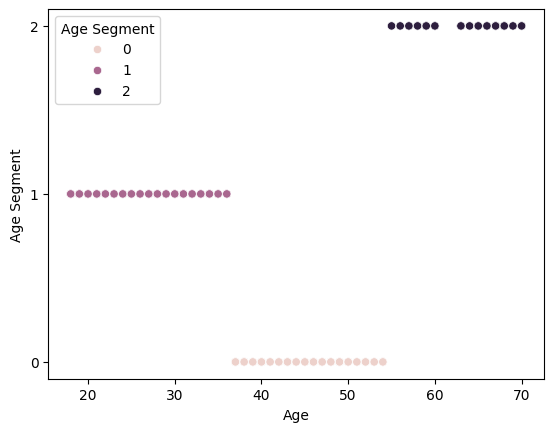

In [22]:
sns.scatterplot(data=customer_data, x='Age', y='Age Segment', hue = 'Age Segment')
plt.yticks(sorted(customer_data['Age Segment'].unique()))
plt.show()

Annual Income Segmentation

In [23]:
inertia_score = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(customer_data[['Annual Income (k$)']])
    inertia_score.append(kmeans.inertia_)

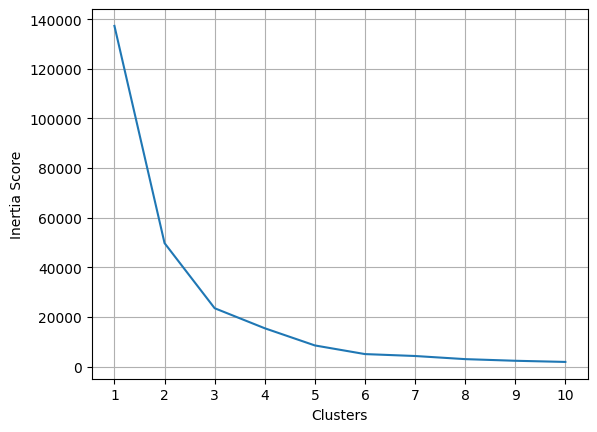

In [24]:
plt.plot(range(1,11), inertia_score)
plt.grid(True)
plt.xlabel("Clusters")
plt.ylabel("Inertia Score")
plt.xticks(np.arange(1,11,1))
plt.show()

In [25]:
kmeans = KMeans(n_clusters=3, random_state=1)
kmeans.fit(customer_data[['Annual Income (k$)']])
customer_data['Annual Income Segment'] = kmeans.labels_
customer_data.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Age Segment,Annual Income Segment
0,1,Male,19,15,39,1,2
1,2,Male,21,15,81,1,2
2,3,Female,20,16,6,1,2
3,4,Female,23,16,77,1,2
4,5,Female,31,17,40,1,2


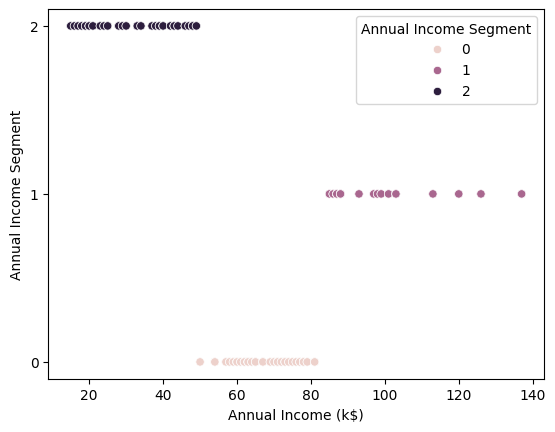

In [26]:
sns.scatterplot(data=customer_data, x='Annual Income (k$)', y='Annual Income Segment', hue = 'Annual Income Segment')
plt.yticks(sorted(customer_data['Annual Income Segment'].unique()))
plt.show()

Spending Score Segmentaion

In [27]:
inertia_score = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(customer_data[['Spending Score (1-100)']])
    inertia_score.append(kmeans.inertia_)

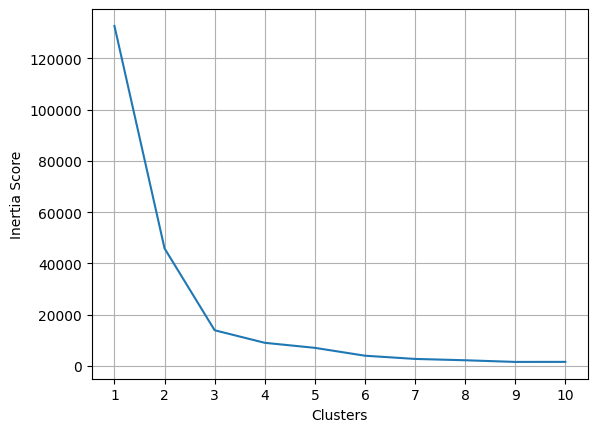

In [28]:
plt.plot(range(1,11), inertia_score)
plt.grid(True)
plt.xlabel("Clusters")
plt.ylabel("Inertia Score")
plt.xticks(np.arange(1,11,1))
plt.show()

In [29]:
kmeans = KMeans(n_clusters=3, random_state=1)
kmeans.fit(customer_data[['Spending Score (1-100)']])
customer_data['Spending Score Segment'] = kmeans.labels_
customer_data.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Age Segment,Annual Income Segment,Spending Score Segment
0,1,Male,19,15,39,1,2,0
1,2,Male,21,15,81,1,2,1
2,3,Female,20,16,6,1,2,2
3,4,Female,23,16,77,1,2,1
4,5,Female,31,17,40,1,2,0


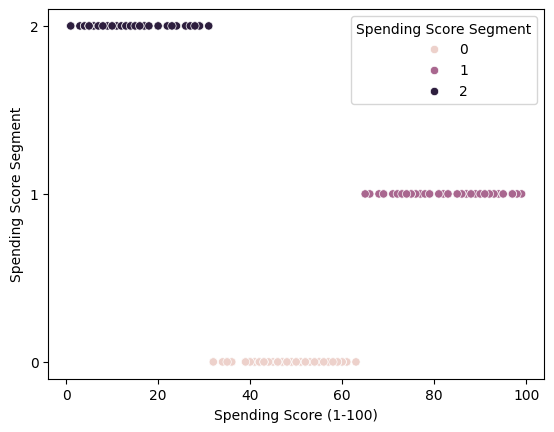

In [30]:
sns.scatterplot(data=customer_data, x='Spending Score (1-100)', y='Spending Score Segment', hue = 'Spending Score Segment')
plt.yticks(sorted(customer_data['Spending Score Segment'].unique()))
plt.show()

In [31]:
from sklearn.preprocessing import StandardScaler

In [32]:
features = customer_data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

In [33]:
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [34]:
X = pd.DataFrame(features_scaled, columns=['Age', 'Annual Income (k$)','Spending Score (1-100)' ])

Spending Score by Age Segmentation

In [35]:
inertia_score = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, random_state=1)
    kmeans.fit(X[['Age', 'Spending Score (1-100)']])
    inertia_score.append(kmeans.inertia_)

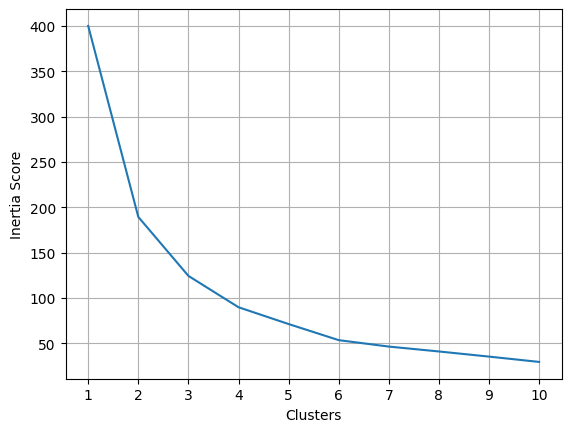

In [36]:
plt.plot(range(1,11), inertia_score)
plt.grid(True)
plt.xlabel("Clusters")
plt.ylabel("Inertia Score")
plt.xticks(np.arange(1,11,1))
plt.show()

In [37]:
kmeans = KMeans(n_clusters=4, random_state=1)
kmeans.fit(X[['Age', 'Spending Score (1-100)']])
customer_data['Spending Score by Age Segment'] = kmeans.labels_
customer_data.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Age Segment,Annual Income Segment,Spending Score Segment,Spending Score by Age Segment
0,1,Male,19,15,39,1,2,0,3
1,2,Male,21,15,81,1,2,1,1
2,3,Female,20,16,6,1,2,2,3
3,4,Female,23,16,77,1,2,1,1
4,5,Female,31,17,40,1,2,0,3


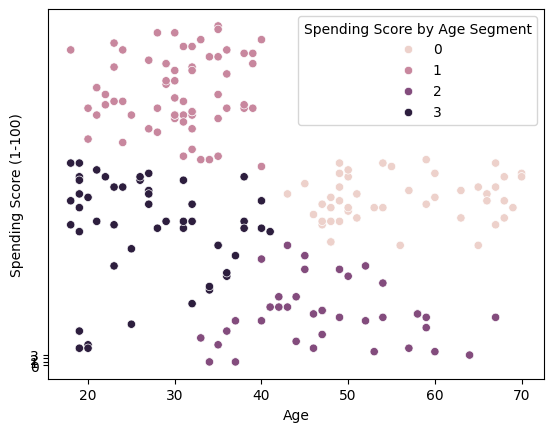

In [38]:
sns.scatterplot(data=customer_data, x='Age', y='Spending Score (1-100)', hue = 'Spending Score by Age Segment')
plt.yticks(sorted(customer_data['Spending Score by Age Segment'].unique()))
plt.show()

Spending Score by Annual Income Segmentation

In [39]:
inertia_score = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, random_state=1)
    kmeans.fit(X[['Annual Income (k$)', 'Spending Score (1-100)']])
    inertia_score.append(kmeans.inertia_)

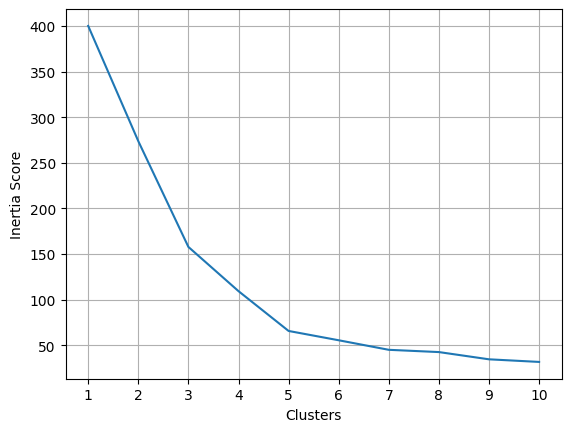

In [40]:
plt.plot(range(1,11), inertia_score)
plt.grid(True)
plt.xlabel("Clusters")
plt.ylabel("Inertia Score")
plt.xticks(np.arange(1,11,1))
plt.show()

In [41]:
kmeans = KMeans(n_clusters=5, random_state=1)
kmeans.fit(X[['Annual Income (k$)', 'Spending Score (1-100)']])
customer_data['Spending Score by Annual Income Segment'] = kmeans.labels_
customer_data.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Age Segment,Annual Income Segment,Spending Score Segment,Spending Score by Age Segment,Spending Score by Annual Income Segment
0,1,Male,19,15,39,1,2,0,3,4
1,2,Male,21,15,81,1,2,1,1,2
2,3,Female,20,16,6,1,2,2,3,4
3,4,Female,23,16,77,1,2,1,1,2
4,5,Female,31,17,40,1,2,0,3,4


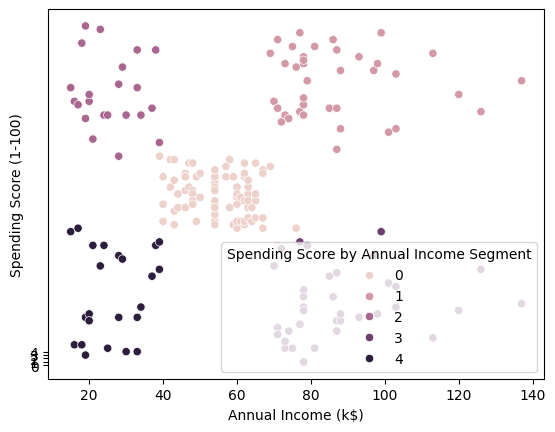

In [42]:
sns.scatterplot(data=customer_data, x='Annual Income (k$)', y='Spending Score (1-100)', hue = 'Spending Score by Annual Income Segment')
plt.yticks(sorted(customer_data['Spending Score by Annual Income Segment'].unique()))
plt.show()

Spending Score and Annual Income by Age Segmentation

In [43]:
inertia_score = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, random_state=1)
    kmeans.fit(X)
    inertia_score.append(kmeans.inertia_)

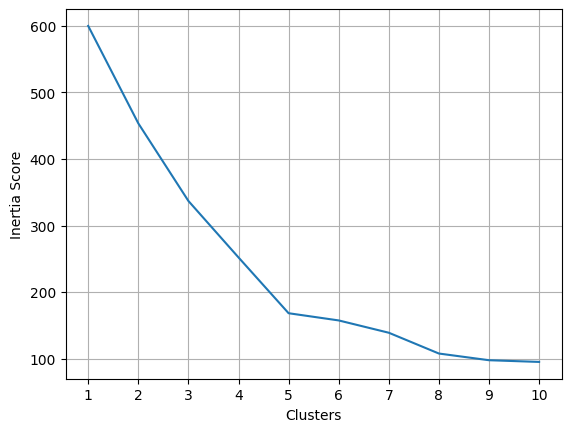

In [44]:
plt.plot(range(1,11), inertia_score)
plt.grid(True)
plt.xlabel("Clusters")
plt.ylabel("Inertia Score")
plt.xticks(np.arange(1,11,1))
plt.show()

In [45]:
kmeans = KMeans(n_clusters=5, random_state=1)
kmeans.fit(X)
customer_data['Spending Score and Annual Income by Age Segment'] = kmeans.labels_
customer_data.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Age Segment,Annual Income Segment,Spending Score Segment,Spending Score by Age Segment,Spending Score by Annual Income Segment,Spending Score and Annual Income by Age Segment
0,1,Male,19,15,39,1,2,0,3,4,1
1,2,Male,21,15,81,1,2,1,1,2,1
2,3,Female,20,16,6,1,2,2,3,4,2
3,4,Female,23,16,77,1,2,1,1,2,1
4,5,Female,31,17,40,1,2,0,3,4,1


In [46]:
from mpl_toolkits.mplot3d import Axes3D

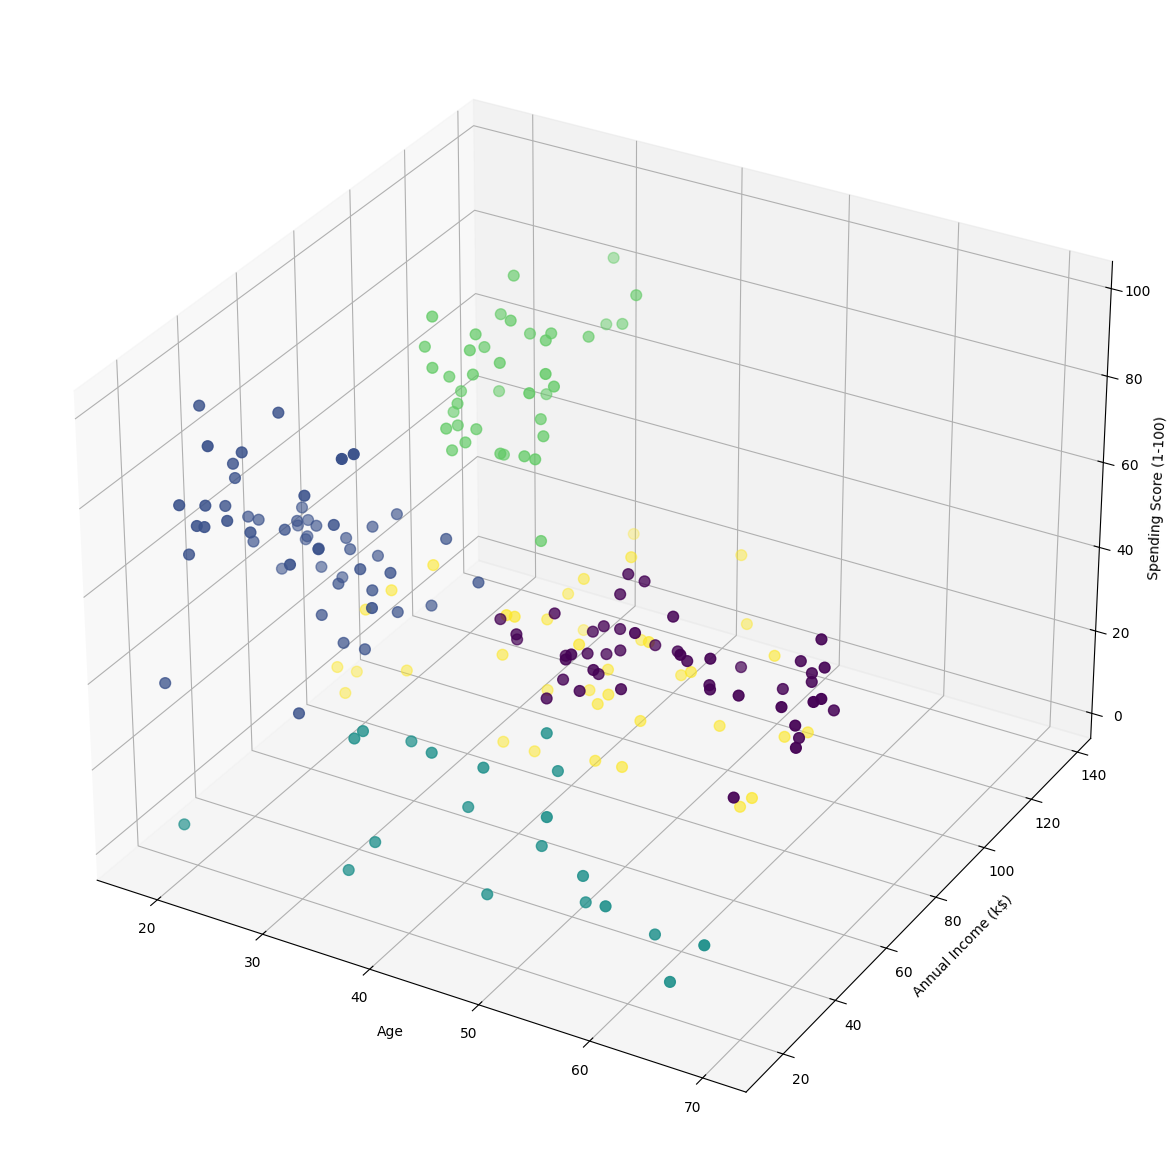

In [47]:
ax = fig = plt.figure(figsize=(15,15)).add_subplot(111, projection='3d')

ax.scatter(
    customer_data['Age'], 
    customer_data['Annual Income (k$)'], 
    customer_data['Spending Score (1-100)'],
    c=customer_data['Spending Score and Annual Income by Age Segment'],
    s = 60,
)
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
plt.show()

In [48]:
from sklearn.metrics import silhouette_score

In [52]:
silhouette_score(X, customer_data['Spending Score and Annual Income by Age Segment'])

np.float64(0.41664341513732767)

In [60]:
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(X)
    score = silhouette_score(X, kmeans.labels_)
    print(f"k={k}, score={score:}")

k=2, score=0.246700041165373
k=3, score=0.29768888233378465
k=4, score=0.341765919381061
k=5, score=0.41664341513732767
k=6, score=0.3704777157273326
k=7, score=0.3560054968642535
k=8, score=0.3990932801267803
k=9, score=0.38176675348293077
k=10, score=0.3461744986726981


In [62]:
customer_data.groupby('Spending Score and Annual Income by Age Segment')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Spending Score and Annual Income by Age Segment,,,
0,55.638298,54.382979,48.851064
1,25.185185,41.092593,62.240741
2,46.250000,26.750000,18.350000
3,32.875000,86.100000,81.525000
4,39.871795,86.102564,19.358974


In [63]:
from sklearn.decomposition import PCA

In [64]:
X_pca = PCA(n_components=2).fit_transform(X)

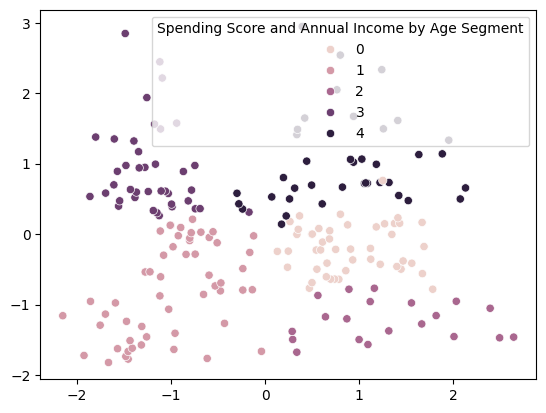

In [65]:
sns.scatterplot(
    x=X_pca[:,0], 
    y=X_pca[:,1], 
    hue=customer_data['Spending Score and Annual Income by Age Segment'])
plt.show()

In [67]:
customer_data.to_csv("Segmented Customers Data.csv")